# Question 1. Implement LeNet on Cifar-100 dataset
1. Load the cifar 100 dataset. Use the 'coarse' labels.
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar100/load_data



In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar100
from matplotlib import pyplot as plt
from keras import models, layers

(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='coarse')


2. Check if there are 20 labels in y_train using np.unique().

In [22]:
np.unique(y_train)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

3. More information about the dataset could be found here : https://www.cs.toronto.edu/~kriz/cifar.html . Plot the first 25 images from both the train and test data.

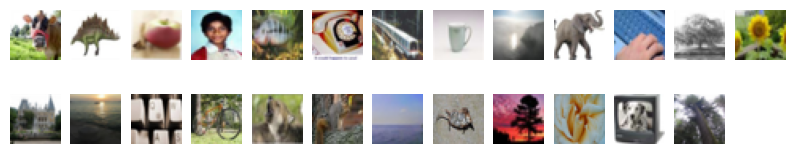

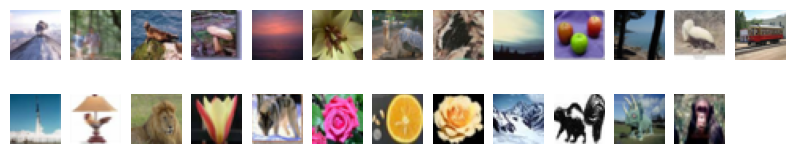

In [23]:
plt.figure(figsize=(10, 2))
for i in range(25):
    plt.subplot(2, 13, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

plt.figure(figsize=(10, 2))
for i in range(25):
    plt.subplot(2, 13, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.axis('off')
plt.show()


4. Normalize the data

In [24]:
X_train = X_train / 255.0
X_test = X_test / 255.0


### 5. LeNet

Since the images are of shape (32,32,3) , we can use LeNet architecture. The first difference is that the images are of RGB format and not grayscale.We just need to change the input shape for that.
The second difference is in the number of output classes.

Others remain same.

**Import layers and models from tensorflow.keras and build the LeNet architecture.**

In [25]:
LeNet = models.Sequential(
    [
        layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(16, (5, 5), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(100),
    ]
)
LeNet.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

In [26]:
LeNet.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = LeNet.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.6061 - accuracy: 0.1997
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.2587 - accuracy: 0.3012
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.1303 - accuracy: 0.3405
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0428 - accuracy: 0.3693
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9765 - accuracy: 0.3888
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9204 - accuracy: 0.4027
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8727 - accuracy: 0.4170
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8309 - accuracy: 0.4303
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7953 - accuracy: 0.4406
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.764

In [30]:
loss, accuracy = LeNet.evaluate(x=X_test, y=y_test, batch_size=32)
print('Test Accuracy :', accuracy)


313/313 [==============================] - 1s 2ms/step - loss: 1.9322 - accuracy: 0.4045
Test Accuracy : 0.40450000762939453


It can be seen that the model couldn't achieve a good accuracy. We need to use better models for this task.

# Question 2 : Implement VGGNet - Part 1

Check this website : https://paperswithcode.com/sota/image-classification-on-cifar-100 . It contains information about the best performing models.

We can check the VGGNet-16 model. It consists of 16 layers with weights and some maxpooling layers. The architecture could be in the internet (even in the slides).

VGGNet works on images of size (224,224,3). However, we can implement it on (32,32,3). We will see both the approaches. First let's build VGGNet and train it on original image. Then, we will reshape our images from (32,32,3) to (224,224,3) and train VGGNet on them.

The layers are :

1. Conv layer : 64 kernels, 3x3 . strides = (1,1). activation =none. Batch Normalization. Relu Activation.
2. Conv layer : 64 kernels, 3x3 . strides = (1,1). activation =none. Batch Normalization. Relu Activation.
3. MaxPooling . kernel = 2x2. strides = (2,2).
4. Conv layer : 128 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
5. Conv layer : 128 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
6. MaxPooling . kernel = 2x2. strides = (2,2).
7. Conv layer : 256 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
8. Conv layer : 256 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
9. Conv layer : 256 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
10. MaxPooling . kernel = 2x2. strides = (2,2).
11. Conv layer : 512 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
12. Conv layer : 512 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
13. Conv layer : 512 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
14. MaxPooling . kernel = 2x2. strides = (2,2).
15. Flatten Layer.
16. Dense layer of 4096 neurons.
17. Dense layer of 1000 neurons.
18. Dense layer of 20 neurons.


I have omitted the last block of three conv layers of 512 kernels because the output sizes reduces to (1,1,512). You may include it and see.

The order of convolution, batch normalization and relu activation matters. If you do relu activation before normalization, it may happen that your loss fails to backpropagate.

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation

(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='coarse')

X_train = X_train / 255.0
X_test = X_test / 255.0

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), strides=(
    1, 1), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)


Epoch 1/10


/Users/nilay/Desktop/Intro-to-ML-and-DL/venv/lib/python3.9/site-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


782/782 [==============================] - 552s 705ms/step - loss: 2.8736 - accuracy: 0.1139
Epoch 2/10
782/782 [==============================] - 580s 742ms/step - loss: 2.4543 - accuracy: 0.2241
Epoch 3/10
782/782 [==============================] - 608s 778ms/step - loss: 2.0812 - accuracy: 0.3381
Epoch 4/10
782/782 [==============================] - 11287s 14s/step - loss: 1.7744 - accuracy: 0.4272
Epoch 5/10
782/782 [==============================] - 503s 643ms/step - loss: 1.5412 - accuracy: 0.4987
Epoch 6/10
782/782 [==============================] - 529s 676ms/step - loss: 1.3590 - accuracy: 0.5563
Epoch 7/10
782/782 [==============================] - 534s 683ms/step - loss: 1.2127 - accuracy: 0.6049
Epoch 8/10
782/782 [==============================] - 558s 713ms/step - loss: 1.0858 - accuracy: 0.6456
Epoch 9/10
782/782 [==============================] - 608s 777ms/step - loss: 0.9716 - accuracy: 0.6821
Epoch 10/10
782/782 [==============================] - 576s 737ms/step - lo

Once you are ready with the model, change runtime to GPU and then train the model, else it will take a lot of time to train it on CPU.

Compile the model using SparseCategoricalCrossentropy Loss Function and accuracy metric. Fit it on the train dataset. and evaluate on the test.

In [2]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy :', accuracy)


/Users/nilay/Desktop/Intro-to-ML-and-DL/venv/lib/python3.9/site-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 [==============================] - 23s 73ms/step - loss: 1.4437 - accuracy: 0.5799
Accuracy : 0.5799000263214111


### Somewhat better !!!

# Question 3 : Implement VGGNet - Part 2


Let's see how the image will look like when it gets resized. The cell already has output. But if you had mistakenly run it, you can correct it by verifying the variable names. The X_train here refers to the original image before normalization.

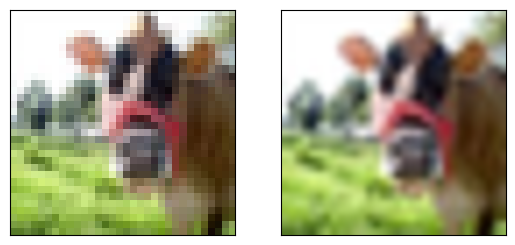

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
plt.subplot(121)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(X_train[0])

pil_image = Image.fromarray(X_train[0])
pil_image = np.array(pil_image.resize((224, 224)))
plt.subplot(122)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(pil_image)


To resize the dataset from (32,32,3) to (224,224,3) , you may try out defining a function. Then applying it on the whole dataset at once and store the output. However, you may run out of memory while doing so.

To counter that, we have a simple solution. tf.keras.layers.Resizing which will resize the image to shape (224,224) and then Rescaling to normalize the images if not done earlier. This method won't return error as model.fit process only a small batch at a time (default 32) and not the whole dataset.


Now, start building the model for input image shape of (224,224,3).
Add input layer of (32,32,3) , Resizing, Rescaling, then the whole model (include all the 5 blocks).

Now, if you want to save some time, reduce the number of neurons in the dense layers.

You may also try out using TPU on this one. Check out how to configure TPU.

# Question 4 Transfer Learning

In this question, we will implement another CNN architecture on the same dataset. However, we won't build it ourselves. We will use the pre-trained weights of the model already available. This is called Transfer Learning.

Now there are many ways of obtaining those weights : Huggingface, Tensorflow Hub, Pytorch Hub, etc etc etc...

However, we won't look into much details and implement only the models present in keras applications (https://www.tensorflow.org/api_docs/python/tf/keras/applications) .

Choose any of the model and train it on the dataset. As a tutorial, refer to this : https://www.tensorflow.org/tutorials/images/transfer_learning .

The only thing you need to know is what should be the input size for a particular model .

Moreover, since our dataset has only 20 classes and most models returns output of 1000 classes, pass in the parameter **include_top=False** while calling the model. This will return only the convolution layers. Then, you can add custom Dense layers for classification.